In [0]:
from __future__ import print_function
import tensorflow.keras
from tensorflow.keras.layers import Dense, Conv2D, BatchNormalization, Activation
from tensorflow.keras.layers import AveragePooling2D, Input, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model

import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
from skimage import color
from skimage import io
from sklearn.model_selection import train_test_split
import scipy.io as sio
%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 4.0)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

import tensorflow.keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import resnet_v2

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.applications import ResNet152V2

base_model= ResNet152V2(weights='imagenet', include_top=False,input_shape=(32, 32, 3)) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation = 'relu')(x)

preds = Dense(10, activation = 'softmax')(x)
model=Model(inputs=base_model.input,outputs=preds)


In [8]:
new_model=model
new_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 18, 18, 64)   0           conv1_conv[0][0]                 
____________________________________________________________________________________________

In [11]:
for i,layer in enumerate(new_model.layers):
  print(i,layer.name, layer.trainable)

0 input_2 False
1 conv1_pad False
2 conv1_conv False
3 pool1_pad False
4 pool1_pool False
5 conv2_block1_preact_bn False
6 conv2_block1_preact_relu False
7 conv2_block1_1_conv False
8 conv2_block1_1_bn False
9 conv2_block1_1_relu False
10 conv2_block1_2_pad False
11 conv2_block1_2_conv False
12 conv2_block1_2_bn False
13 conv2_block1_2_relu False
14 conv2_block1_0_conv False
15 conv2_block1_3_conv False
16 conv2_block1_out False
17 conv2_block2_preact_bn False
18 conv2_block2_preact_relu False
19 conv2_block2_1_conv False
20 conv2_block2_1_bn False
21 conv2_block2_1_relu False
22 conv2_block2_2_pad False
23 conv2_block2_2_conv False
24 conv2_block2_2_bn False
25 conv2_block2_2_relu False
26 conv2_block2_3_conv False
27 conv2_block2_out False
28 conv2_block3_preact_bn False
29 conv2_block3_preact_relu False
30 conv2_block3_1_conv True
31 conv2_block3_1_bn True
32 conv2_block3_1_relu True
33 conv2_block3_2_pad True
34 conv2_block3_2_conv True
35 conv2_block3_2_bn True
36 conv2_block3_2_r

In [0]:
for layer in new_model.layers[:30]:
    layer.trainable=False
for layer in new_model.layers[30:]:
    layer.trainable=True

In [0]:
# select tensorflow 2 in colab
%tensorflow_version 2.x

# install tensorflow 2 and tensorflow datasets on a personal machine
# !pip install tensorflow-gpu
# !pip install tensorflow-datasets

# tenorflow
import tensorflow as     tf
from   tensorflow import keras

# tensorflow datasets
import tensorflow_datasets as tfds

# additional libraries
import math
import numpy             as np
import matplotlib.pyplot as plt
# %matplotlib inline

# version check
# print(tf.__version__)
from __future__ import print_function
import tensorflow.keras
from tensorflow.keras.layers import Dense, Conv2D, BatchNormalization, Activation
from tensorflow.keras.layers import AveragePooling2D, Input, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model

import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
from skimage import color
from skimage import io
from sklearn.model_selection import train_test_split
import scipy.io as sio
%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 4.0)

In [13]:
train_data = sio.loadmat('/content/drive/My Drive/Data/train_32x32.mat')
test_data = sio.loadmat('/content/drive/My Drive/Data/test_32x32.mat')
X_train, y_train = train_data['X'], train_data['y']
X_test, y_test = test_data['X'], test_data['y']
print("Training Set", X_train.shape, y_train.shape)
print("Test Set", X_test.shape, y_test.shape)
X_train, y_train = X_train.transpose((3,0,1,2)), y_train[:,0]
X_test, y_test = X_test.transpose((3,0,1,2)), y_test[:,0]
print("Training Set", X_train.shape)
print("Test Set", X_test.shape)
print('')


Training Set (32, 32, 3, 73257) (73257, 1)
Test Set (32, 32, 3, 26032) (26032, 1)
Training Set (73257, 32, 32, 3)
Test Set (26032, 32, 32, 3)



In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
input_shape = X_train.shape[1:]
input_shape

(32, 32, 3)

In [0]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255


In [0]:
y_train[y_train == 10] = 0
y_test[y_test == 10] = 0


In [18]:
X_train

array([[[[0.12941177, 0.11764706, 0.14901961],
         [0.05882353, 0.09019608, 0.07450981],
         [0.05882353, 0.06666667, 0.07450981],
         ...,
         [0.28235295, 0.25490198, 0.21960784],
         [0.32156864, 0.3019608 , 0.22352941],
         [0.34901962, 0.30980393, 0.23137255]],

        [[0.10980392, 0.15294118, 0.13725491],
         [0.05490196, 0.09803922, 0.08627451],
         [0.05490196, 0.07843138, 0.06666667],
         ...,
         [0.15686275, 0.15294118, 0.19607843],
         [0.2627451 , 0.22745098, 0.20392157],
         [0.3254902 , 0.30588236, 0.23529412]],

        [[0.15686275, 0.16078432, 0.14901961],
         [0.07058824, 0.08235294, 0.10196079],
         [0.0627451 , 0.06666667, 0.09019608],
         ...,
         [0.09019608, 0.11372549, 0.1764706 ],
         [0.13725491, 0.16470589, 0.17254902],
         [0.28235295, 0.27058825, 0.20784314]],

        ...,

        [[0.3372549 , 0.31764707, 0.29411766],
         [0.34117648, 0.32156864, 0.2784314 ]

In [19]:
SUBTRACT_PIXEL_MEAN = True
if SUBTRACT_PIXEL_MEAN:
    X_train_mean = np.mean(X_train, axis=0)
    X_train -= X_train_mean
    X_test -= X_train_mean

print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print('y_train shape:', X_train.shape)

x_train shape: (73257, 32, 32, 3)
73257 train samples
26032 test samples
y_train shape: (73257, 32, 32, 3)


In [20]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[:4]

Using TensorFlow backend.


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [21]:

#new_model = change_model(model,new_input_shape=(None, 32,32, 3))

new_model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
new_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 18, 18, 64)   0           conv1_conv[0][0]                 
____________________________________________________________________________________________

In [22]:
from datetime import datetime
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping
t1 = datetime.now()

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=6, verbose=1, mode='auto')
checkpointer = ModelCheckpoint(filepath="/content/drive/My Drive/Data/weights.best.resnet1.hdf5", verbose=0, save_best_only=True) # save best model
history = new_model.fit(X_train, y_train, validation_data= (X_test, y_test), callbacks=[monitor,checkpointer],verbose=2,epochs=1000)
new_model.load_weights('/content/drive/My Drive/Data/weights.best.resnet1.hdf5') # load weights from best model
train_time = datetime.now() - t1

Epoch 1/1000
2290/2290 - 210s - loss: 1.9651 - accuracy: 0.2875 - val_loss: 1.6481 - val_accuracy: 0.4042
Epoch 2/1000
2290/2290 - 207s - loss: 1.5522 - accuracy: 0.4422 - val_loss: 1.3684 - val_accuracy: 0.5120
Epoch 3/1000
2290/2290 - 207s - loss: 1.2374 - accuracy: 0.5614 - val_loss: 1.3375 - val_accuracy: 0.5711
Epoch 4/1000
2290/2290 - 207s - loss: 1.0437 - accuracy: 0.6492 - val_loss: 0.8534 - val_accuracy: 0.7278
Epoch 5/1000
2290/2290 - 198s - loss: 0.9714 - accuracy: 0.6837 - val_loss: 1.0179 - val_accuracy: 0.6787
Epoch 6/1000
2290/2290 - 198s - loss: 1.0908 - accuracy: 0.6557 - val_loss: 1.0251 - val_accuracy: 0.6872
Epoch 7/1000
2290/2290 - 207s - loss: 0.9072 - accuracy: 0.7207 - val_loss: 0.8008 - val_accuracy: 0.7560
Epoch 8/1000
2290/2290 - 198s - loss: 0.7643 - accuracy: 0.7635 - val_loss: 38.4670 - val_accuracy: 0.7243
Epoch 9/1000
2290/2290 - 198s - loss: 0.7555 - accuracy: 0.7715 - val_loss: 3.4453 - val_accuracy: 0.7248
Epoch 10/1000
2290/2290 - 198s - loss: 0.6360

In [25]:
X_test.shape,y_test.shape,y_train.shape

((26032, 32, 32, 3), (26032, 10), (73257, 10))

In [0]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1) # raw probabilities to choose class (highest probability)
print(y_pred)
y_test = np.argmax(y_test, axis = 1)
print(y_test)

In [28]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.9024661954517517

In [29]:
score = metrics.precision_score(y_test, y_pred, average= "weighted")
print("Precision-score: {}".format(score))

Precision-score: 0.9022671534089899


In [30]:
score = metrics.recall_score(y_test, y_pred, average= "weighted")
print("Recall-score: {}".format(score))

Recall-score: 0.9024661954517517


In [31]:
score = metrics.f1_score(y_test,  y_pred, average= "weighted")
print("F1-score: {}".format(score))


F1-score: 0.9021307992296448


In [0]:
classification = metrics.classification_report(y_test, y_pred)
from sklearn.metrics import confusion_matrix, classification_report

In [33]:
print(confusion_matrix)
print(classification)
print(accuracy)


<function confusion_matrix at 0x7f12ac7432f0>
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1744
           1       0.92      0.95      0.93      5099
           2       0.94      0.93      0.94      4149
           3       0.88      0.85      0.87      2882
           4       0.90      0.94      0.92      2523
           5       0.89      0.90      0.90      2384
           6       0.89      0.85      0.87      1977
           7       0.92      0.92      0.92      2019
           8       0.85      0.80      0.83      1660
           9       0.84      0.88      0.86      1595

    accuracy                           0.90     26032
   macro avg       0.89      0.89      0.89     26032
weighted avg       0.90      0.90      0.90     26032

0.9024661954517517


In [0]:
%matplotlib inline
from sklearn.metrics import roc_curve, auc

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[1553   42   11   11   13    5   33    7   36   33]
 [  29 4838   42   30   63   19    4   65    4    5]
 [   6   62 3873   49   44    8    1   56   17   33]
 [   5   71   44 2462   29   90   13   17   55   96]
 [  12   74   25   14 2366    6    4    6    6   10]
 [   6   17   13   86   28 2136   54    3   18   23]
 [  30   29    4   20   42   83 1679    9   68   13]
 [   2   94   42    8    9    3    0 1858    1    2]
 [  19   16   16   91   15   27  100    3 1325   48]
 [  47   24   46   19   17   12    2    3   22 1403]]
Plotting confusion matrix


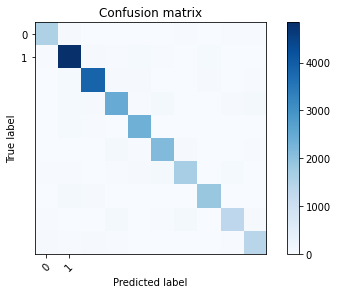

In [35]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
print(cm)

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, [0, 1])
plt.show()

In [0]:
prediction_array = model.predict(X_test)
predicted_class = np.argmax(prediction_array, axis=1)


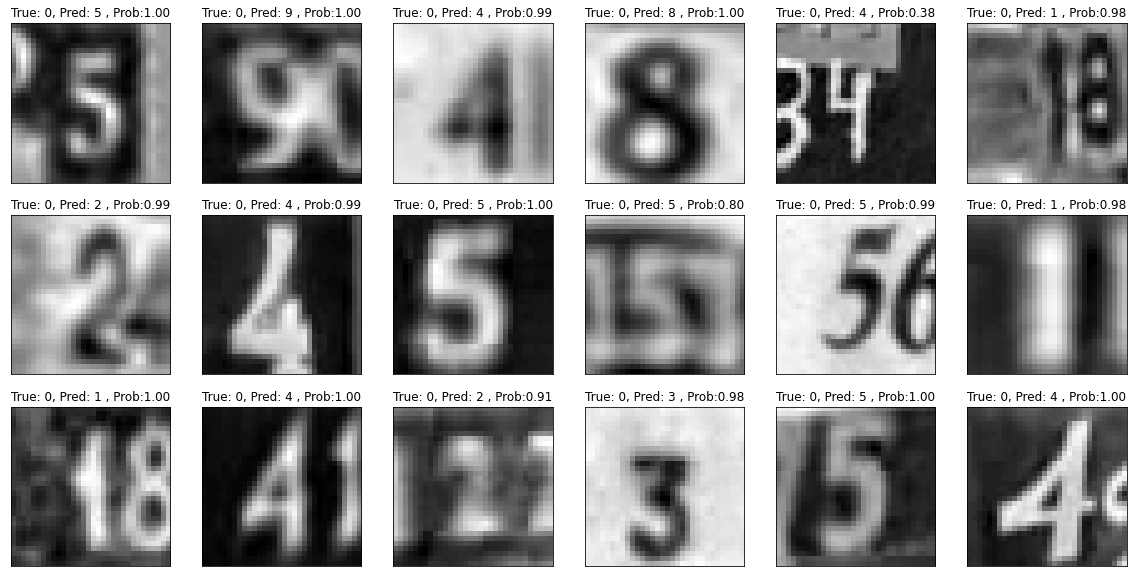

In [37]:
def plot_predicted_label(images, nrows, ncols, cls_true, cls_pred,prediction_array):
    fig, axes = plt.subplots(nrows, ncols,figsize=(20, 10))
    
    rs = np.random.choice(images.shape[0], nrows*ncols)
    
    for i, ax in zip(rs, axes.flat):
        prob = round(prediction_array[i][cls_pred[i]],2)
        title = 'True: %s, Pred: %s , Prob:%0.2f' % (np.argmax(cls_true[i]),cls_pred[i],prob)
        ax.imshow(images[i,:,:,0], cmap='binary')
        ax.set_title(title)
         
        ax.set_xticks([])
        ax.set_yticks([])


# ploat image with predicted and actual value
num_rows = 3
num_cols = 6
plot_predicted_label(X_test,num_rows, num_cols, y_test,predicted_class,prediction_array);